# 边界填充

# 1. 边界填充简介

# OpenCV 图像边界填充 (Padding) 详解

这份文件主要讲解了 **OpenCV 中图像边界填充（Padding）** 的概念和不同的填充模式。

简单来说，**边界填充**就是给一张图片“加相框”或者把图片变大，多出来的边缘部分需要用什么颜色或像素去填补。

---

## 1. 核心概念

* **目的**：对原始图像进行变换，使其尺寸变大。这在卷积操作（卷积核在边缘扫描时需要扩充边缘）或图像处理中非常常见。
* **函数**：`cv2.copyMakeBorder()`
* **参数**：`top, bottom, left, right` 分别代表上下左右要填充多少像素宽度的边界。

---

## 2. 五种填充模式详解

假设我们有一行原始像素：`[ a b c d e ]`
现在我们要在这个序列的**左边**填充几个像素。

### ① BORDER_REPLICATE (复制法)
* **原理**：直接复制最边缘的那个像素点，就像把边缘“拉长”了一样。
* **生活例子**：电脑卡顿时，你拖动窗口留下的残影，边缘颜色一直延伸。
* **演示**：
    * 原始：`[ a b c d e ]`
    * 填充后：**`a a a`** `| [ a b c d e ] |` **`e e e`**
    * (左边全填 `a`，右边全填 `e`)

### ② BORDER_REFLECT (反射法 / 镜面法)
* **原理**：在图像边缘放一面镜子，把图像里面的内容倒映出来填充到边界。**注意：边缘像素本身也会被重复。**
* **演示**：
    * 原始：`[ a b c d e ]`
    * 填充后：**`d c b a`** `| [ a b c d e ] |` **`e d c b`**
    * (左边是 `a` 的倒影 `b c d...`，右边是 `e` 的倒影 `d c b...`)

### ③ BORDER_REFLECT_101 (反射法_101 / 默认镜面法)
* **原理**：这也是照镜子，但它和上面那个有一点微小的区别。它以**最边缘的像素为轴**进行对称。**边缘像素本身不会被重复复制**，而是复制边缘里面的像素。
* **特点**：这是 OpenCV 的默认填充方式，因为它过渡更自然。
* **演示**：
    * 原始：`[ a b c d e ]`
    * 填充后：**`d c b`** `| [ a b c d e ] |` **`d c b`**
    * (注意看左边：它跳过了 `a`，直接反射 `b`。如果用 `BORDER_REFLECT`，左边第一个会是 `a`。)

### ④ BORDER_WRAP (外包装法 / 平铺法)
* **原理**：就像贴瓷砖或者电脑桌面的“平铺”模式。左边的边界用右边的图像来补，右边的边界用左边的图像来补。
* **演示**：
    * 原始：`[ a b c d e ]`
    * 填充后：**`c d e`** `| [ a b c d e ] |` **`a b c`**
    * (左边缺了，就拿最右边的 `cde` 补过来；右边缺了，就拿最左边的 `abc` 补过去。)

### ⑤ BORDER_CONSTANT (常量法)
* **原理**：最简单粗暴，用一个固定的颜色（数值）去填充。比如填纯黑、纯白。
* **生活例子**：给照片加一个纯黑色的相框。
* **演示**：
    * 假设指定常数值为 `0` (黑色)
    * 原始：`[ a b c d e ]`
    * 填充后：**`0 0 0`** `| [ a b c d e ] |` **`0 0 0`**

---

## 3. 总结对比图

为了方便记忆，看这个字符图（假设原始数据是 `abcdefgh`）：

| 模式 | 填充效果示意 (左侧填充 | 原始数据 | 右侧填充) | 特点 |
| :--- | :--- | :--- | :--- | :--- |
| **REPLICATE** | `aaaaaa` | `abcdefgh` | `hhhhhh` | 边缘拉伸，首尾重复 |
| **REFLECT** | `fedcba` | `abcdefgh` | `hgfedc` | 包含边缘像素的完整镜像 |
| **REFLECT_101** | `gfedcb` | `abcdefgh` | `gfedcb` | **不**包含边缘像素的镜像 (更平滑) |
| **WRAP** | `cdefgh` | `abcdefgh` | `abcdef` | 有点像贪吃蛇，左边连右边 |
| **CONSTANT** | `000000` | `abcdefgh` | `000000` | 纯色填充 |

① 边界填充就是对图像进行一些变换，让原始图像进行扩大。

② 边界填充的入口参数：
- BORDER_REPLICATE：复制法，也就是复制最边缘像素。
- BORDER_REFLECT：反射法，对感兴趣的图像中的像素在两边进行复制例如：fedcba|abcdefgh|hgfedcb   
- BORDER_REFLECT_101：反射法，也就是以最边缘像素为轴，对称，gfedcb|abcdefgh|gfedcba
- BORDER_WRAP：外包装法cdefgh|abcdefgh|abcdefg  
- BORDER_CONSTANT：常量法，常数值填充。

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包


In [10]:
import cv2

# 读取图像
img = cv2.imread('01_Picture/01_cat.jpg')

# 定义上下左右填充的像素宽度
# 语法：变量 = (上, 下, 左, 右)
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50) 
Img = [img]
# --- 核心函数：cv2.copyMakeBorder ---
# 通用语法：cv2.copyMakeBorder(src, top, bottom, left, right, borderType, [value])
# 参数说明：
#   src: 输入图像
#   top, bottom, left, right: 对应方向的填充像素数
#   borderType: 填充模式（核心参数）
#   value: 当 borderType 为 BORDER_CONSTANT 时使用的颜色值

# 方式一：复制法 (BORDER_REPLICATE)
# 语法：borderType=cv2.BORDER_REPLICATE
# 作用：直接复制最边缘的像素进行填充。
# 效果示例：aaaaaa | abcdefgh | hhhhhh  (像拉伸了边缘)
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, 
                               borderType=cv2.BORDER_REPLICATE) 
Img.append(replicate)
# 方式二：反射法 (BORDER_REFLECT)
# 语法：cv2.BORDER_REFLECT
# 作用：以图像边缘为轴进行反射（包含边缘像素本身）。
# 效果示例：fedcba | abcdefgh | hgfedc (边缘像素 a 和 h 被重复了一次)
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, 
                             cv2.BORDER_REFLECT)
Img.append(reflect)
# 方式三：反射法二 (BORDER_REFLECT_101) - *OpenCV 默认方式*
# 语法：cv2.BORDER_REFLECT_101
# 作用：以图像边缘为轴进行反射，但**不复制边缘像素本身**。
# 效果示例：gfedcb | abcdefgh | gfedcb (边缘像素 a 和 h 没有被重复，效果更自然)
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, 
                                cv2.BORDER_REFLECT_101)      
Img.append(reflect101)
# 方式四：外包装法 (BORDER_WRAP)
# 语法：borderType=cv2.BORDER_WRAP
# 作用：平铺填充。左边填充右边的内容，右边填充左边的内容（类似纹理平铺）。
# 效果示例：cdefgh | abcdefgh | abcdef (像贪吃蛇一样传送)
wrap = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, 
                          borderType=cv2.BORDER_WRAP)
Img.append(wrap)
# 方式五：常量法 (BORDER_CONSTANT)
# 语法：cv2.BORDER_CONSTANT, value=数值
# 作用：使用常数值（纯色）进行填充。需要配合 value 参数。
# 效果示例：000000 | abcdefgh | 000000 (value=0 为黑色，value=(255,0,0) 为蓝色等)
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, 
                              cv2.BORDER_CONSTANT, value=0)
Img.append(constant)

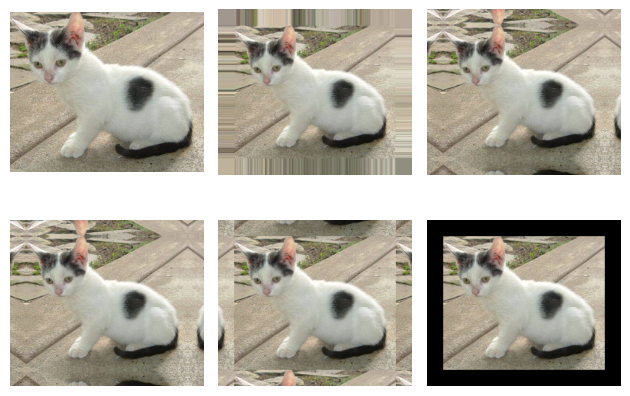

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,3,f)
for a,img in zip( ax.flatten() , Img ):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    a.imshow(img)
    a.axis('off')
plt.tight_layout()
plt.show()



# 2. 阈值越界处理

In [16]:
img_cat = cv2.imread('01_Picture/01_cat.jpg')
img_dog = cv2.imread('01_Picture/03_dog.jpg')

img_cat2 = img_cat + 10 # 将 img_cat 矩阵中每一个值都加 10
print(img_cat[:5,:,0])
print(img_cat2[:5,:,0])
print((img_cat+img_cat2)[:5,:,0])  # 0-255 若相加越界后 294 用 294%256 获得余数 38     

[[142 146 151 ... 156 155 154]
 [108 112 118 ... 155 154 153]
 [108 110 118 ... 156 155 154]
 [139 141 148 ... 156 155 154]
 [153 156 163 ... 160 159 158]]
[[152 156 161 ... 166 165 164]
 [118 122 128 ... 165 164 163]
 [118 120 128 ... 166 165 164]
 [149 151 158 ... 166 165 164]
 [163 166 173 ... 170 169 168]]
[[ 38  46  56 ...  66  64  62]
 [226 234 246 ...  64  62  60]
 [226 230 246 ...  66  64  62]
 [ 32  36  50 ...  66  64  62]
 [ 60  66  80 ...  74  72  70]]


In [17]:
cv2.add(img_cat,img_cat2)[:5,0] # cv2.add 是越界后取最大值 255

array([[255, 255, 255],
       [226, 244, 255],
       [226, 248, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)